In [2]:
# 필요한 라이브러리 설치
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import math
import nltk
import pickle
from nltk.corpus import stopwords
import re
from pandas import DataFrame

In [3]:
# 파일 받아오기
pos_df =pd.read_csv("concat_all_unseen.csv")
# ID 열은 제거
pos_df = pos_df.drop(['Unnamed: 0'], axis=1)


In [4]:
pos_df['SUBJECT'] = pos_df['SUBJECT'].str.replace("[^a-zA-Z]"," ")

#빈 문자열 NAN 값으로 바꾸기
pos_df = pos_df.replace({'': np.nan})
pos_df = pos_df.replace(r'^\s*$', None, regex=True)

#NAN 이 있는 행은 삭제
pos_df=pos_df.dropna()
pos_df=pos_df.reset_index()
pos_df = pos_df.drop(['index'], axis=1)

In [5]:
subject_pos_df = pos_df['SUBJECT']

In [6]:
subject_pos_df = DataFrame(subject_pos_df.str.lower())

In [7]:
subject_pos_df

,SUBJECT
0,do sweat it
1,sign up travis scott x air jordan xi britis...
2,glass half full vibes
3,w
4,steam
...,...
3250,daily devblog
3251,sw sw ...
3252,ybm family
3253,daily devblog


In [8]:
subject_pos_df['wordTokens'] ="zz"
a=0
for i in subject_pos_df['SUBJECT']:
    print(i)
    tokens = nltk.word_tokenize(i)
    print(tokens)
    subject_pos_df['wordTokens'][a] = tokens
    a+=1

do sweat it
['do', 'sweat', 'it']
sign up   travis scott x air jordan xi  british khaki 
['sign', 'up', 'travis', 'scott', 'x', 'air', 'jordan', 'xi', 'british', 'khaki']
glass half full vibes
['glass', 'half', 'full', 'vibes']
                    w         
['w']
  steam                             
['steam']
levi s  for valentino
['levi', 's', 'for', 'valentino']
 kg                                                 
['kg']
another green world   spring     editorial
['another', 'green', 'world', 'spring', 'editorial']
           fresh                               
['fresh']
your steam account  access from new computer
['your', 'steam', 'account', 'access', 'from', 'new', 'computer']
you lost the draw
['you', 'lost', 'the', 'draw']
     denim shorts
['denim', 'shorts']
you lost the draw
['you', 'lost', 'the', 'draw']
meet the best dressed men of april
['meet', 'the', 'best', 'dressed', 'men', 'of', 'april']
new                            
['new']
we ve got your size
['we', 've', 'got',

fall           
['fall']
further reductions up to     off
['further', 'reductions', 'up', 'to', 'off']
     obey korea pictorial   worksout   ss season off
['obey', 'korea', 'pictorial', 'worksout', 'ss', 'season', 'off']
     spring   summer vo   
['spring', 'summer', 'vo']
     obey korea pictorial   worksout   ss season off
['obey', 'korea', 'pictorial', 'worksout', 'ss', 'season', 'off']
the latest arrivals from   moncler frgmt hiroshi fujiwara  wacko maria   brain dead   shop now
['the', 'latest', 'arrivals', 'from', 'moncler', 'frgmt', 'hiroshi', 'fujiwara', 'wacko', 'maria', 'brain', 'dead', 'shop', 'now']
     new           
['new']
                                                      abc   
['abc']
nhn kcp                     
['nhn', 'kcp']
     ssf        x                        s s          
['ssf', 'x', 's', 's']
something blue for summer
['something', 'blue', 'for', 'summer']
this week s new arrivals   f  king awesome
['this', 'week', 's', 'new', 'arrivals', 'f', 'king'

utd podcast  sir alex ferguson   the one you ve been waiting for 
['utd', 'podcast', 'sir', 'alex', 'ferguson', 'the', 'one', 'you', 've', 'been', 'waiting', 'for']
     tv                       
['tv']
                             d   
['d']
 kg                                                 
['kg']
nhn kcp                     
['nhn', 'kcp']
 daily devblog            
['daily', 'devblog']
which designers are trending where you are 
['which', 'designers', 'are', 'trending', 'where', 'you', 'are']
welcome to watches and wonders
['welcome', 'to', 'watches', 'and', 'wonders']
air jordan   high retro og  prototype  release
['air', 'jordan', 'high', 'retro', 'og', 'prototype', 'release']
     adidas x james bond                                    
['adidas', 'x', 'james', 'bond']
why officine g n rale is the well dressed man s secret weapon
['why', 'officine', 'g', 'n', 'rale', 'is', 'the', 'well', 'dressed', 'man', 's', 'secret', 'weapon']
        grammar in use                    d   
[

the iconic adidas teamgeist design  re imagined for a new era 
['the', 'iconic', 'adidas', 'teamgeist', 'design', 're', 'imagined', 'for', 'a', 'new', 'era']
stay warm out there with some new seasonal heat
['stay', 'warm', 'out', 'there', 'with', 'some', 'new', 'seasonal', 'heat']
     yeezy     ash grey                   
['yeezy', 'ash', 'grey']
justin for balenciaga
['justin', 'for', 'balenciaga']
this week s new arrivals 
['this', 'week', 's', 'new', 'arrivals']
     ybm   x                         
['ybm', 'x']
 daily devblog            
['daily', 'devblog']
shop the yeezy  quantum amber tint now
['shop', 'the', 'yeezy', 'quantum', 'amber', 'tint', 'now']
    off cdg play for a limited time only
['off', 'cdg', 'play', 'for', 'a', 'limited', 'time', 'only']
                        go 
['go']
     raffle for new balance x stone island   vault by vans   carhartt wip   human made
['raffle', 'for', 'new', 'balance', 'x', 'stone', 'island', 'vault', 'by', 'vans', 'carhartt', 'wip', 'hum

['adidas', 'spezial', 'pre', 'spring', 'now', 'live', 'on', 'launches']
           moments of reserve                       vol    
['moments', 'of', 'reserve', 'vol']
adidas originals x spezial pre spring    
['adidas', 'originals', 'x', 'spezial', 'pre', 'spring']
tiangolo fastapi            
['tiangolo', 'fastapi']
           fresh                best               
['fresh', 'best']
have you seen these new arrivals from common projects 
['have', 'you', 'seen', 'these', 'new', 'arrivals', 'from', 'common', 'projects']
 daily devblog            
['daily', 'devblog']
              soc                      true            
['soc', 'true']
                  notice on the use of personal information
['notice', 'on', 'the', 'use', 'of', 'personal', 'information']
                                         erica       
['erica']
welcome to minimalist nirvana
['welcome', 'to', 'minimalist', 'nirvana']
         d           
['d']
nike dunk retro high white   university red release og sneaker n

['back', 'in', 'stock', 'sold', 'out', 'pieces', 'from', 'stone', 'island', 'loro', 'piana', 'balenciaga', 'and', 'more', 'are', 'here']
     ybm                                           
['ybm']
 daily devblog            
['daily', 'devblog']
introducing iconscout for adobe xd  
['introducing', 'iconscout', 'for', 'adobe', 'xd']
   mooc                      
['mooc']
further markdown  extra     off from human made  palm angels  stone island  and more 
['further', 'markdown', 'extra', 'off', 'from', 'human', 'made', 'palm', 'angels', 'stone', 'island', 'and', 'more']
     ssf                part                       rouje                
['ssf', 'part', 'rouje']
our favourite new releases from watches and wonders     
['our', 'favourite', 'new', 'releases', 'from', 'watches', 'and', 'wonders']
ss edit  porter yoshida
['ss', 'edit', 'porter', 'yoshida']
the spring wardrobe  new balance  gramicci  st ssy  stone island  and more 
['the', 'spring', 'wardrobe', 'new', 'balance', 'gramicci

In [9]:
subject_pos_df = subject_pos_df.replace('zz', np.nan) # 빈 값 결측치로 처리

In [10]:
subject_pos_df.isnull().sum()

SUBJECT       0
wordTokens    0
dtype: int64

In [11]:
subject_pos_df['posTag'] ="zz"
a=0
for i in subject_pos_df['wordTokens']:
    print(i)
    tokens_pos = nltk.pos_tag(i)
    print(tokens_pos)
    subject_pos_df['posTag'][a] = tokens_pos
    a+=1

['do', 'sweat', 'it']
[('do', 'VBP'), ('sweat', 'VB'), ('it', 'PRP')]
['sign', 'up', 'travis', 'scott', 'x', 'air', 'jordan', 'xi', 'british', 'khaki']
[('sign', 'NN'), ('up', 'RP'), ('travis', 'NN'), ('scott', 'NN'), ('x', 'NNP'), ('air', 'NN'), ('jordan', 'NN'), ('xi', 'NNP'), ('british', 'JJ'), ('khaki', 'NN')]
['glass', 'half', 'full', 'vibes']
[('glass', 'NN'), ('half', 'NN'), ('full', 'JJ'), ('vibes', 'NN')]
['w']
[('w', 'NN')]
['steam']
[('steam', 'NN')]
['levi', 's', 'for', 'valentino']
[('levi', 'NN'), ('s', 'NN'), ('for', 'IN'), ('valentino', 'NN')]
['kg']
[('kg', 'NN')]
['another', 'green', 'world', 'spring', 'editorial']
[('another', 'DT'), ('green', 'JJ'), ('world', 'NN'), ('spring', 'NN'), ('editorial', 'NN')]
['fresh']
[('fresh', 'JJ')]
['your', 'steam', 'account', 'access', 'from', 'new', 'computer']
[('your', 'PRP$'), ('steam', 'NN'), ('account', 'NN'), ('access', 'NN'), ('from', 'IN'), ('new', 'JJ'), ('computer', 'NN')]
['you', 'lost', 'the', 'draw']
[('you', 'PRP'), 

[('steam', 'NN')]
['dfwd']
[('dfwd', 'NN')]
['yes', 'or', 'no']
[('yes', 'NNS'), ('or', 'CC'), ('no', 'DT')]
['yours', 'exclusively']
[('yours', 'NNS'), ('exclusively', 'RB')]
['l', 'point']
[('l', 'NN'), ('point', 'NN')]
['raffle', 'open', 'jordan', 'retro', 'high', 'og', 'shadow']
[('raffle', 'NN'), ('open', 'JJ'), ('jordan', 'NN'), ('retro', 'NN'), ('high', 'JJ'), ('og', 'NN'), ('shadow', 'NN')]
['matchday', 'preview', 'liverpool', 'everything', 'you', 'need', 'to', 'know', 'plus', 'vote', 'for', 'your', 'player', 'of', 'the', 'year']
[('matchday', 'JJ'), ('preview', 'VB'), ('liverpool', 'NN'), ('everything', 'NN'), ('you', 'PRP'), ('need', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('plus', 'JJ'), ('vote', 'NN'), ('for', 'IN'), ('your', 'PRP$'), ('player', 'NN'), ('of', 'IN'), ('the', 'DT'), ('year', 'NN')]
['fresh', 'kg', 'x']
[('fresh', 'JJ'), ('kg', 'NN'), ('x', 'NN')]
['five', 'picks', 'just', 'for', 'you', 'kim']
[('five', 'CD'), ('picks', 'NNS'), ('just', 'RB'), ('for', 'IN'), ('y

[('fresh', 'JJ'), ('l', 'NN'), ('pay', 'NN')]
['ready', 'set', 'shop', 'the', 'sale', 'starts', 'now']
[('ready', 'JJ'), ('set', 'NN'), ('shop', 'VBD'), ('the', 'DT'), ('sale', 'NN'), ('starts', 'VBZ'), ('now', 'RB')]
['editorial', 'archive', 'a', 'roundup', 'of', 'last', 'week', 's', 'top', 'stories']
[('editorial', 'NN'), ('archive', 'VBP'), ('a', 'DT'), ('roundup', 'NN'), ('of', 'IN'), ('last', 'JJ'), ('week', 'NN'), ('s', 'VBD'), ('top', 'JJ'), ('stories', 'NNS')]
['l', 'point']
[('l', 'NN'), ('point', 'NN')]
['sale']
[('sale', 'NN')]
['end', 'x', 'alyx', 'sm', 'schematic', 'register', 'now']
[('end', 'NN'), ('x', 'NN'), ('alyx', 'NN'), ('sm', 'JJ'), ('schematic', 'JJ'), ('register', 'NN'), ('now', 'RB')]
['yeezy', 'boost', 'mnvn', 'bright', 'cyan']
[('yeezy', 'NN'), ('boost', 'NN'), ('mnvn', 'NN'), ('bright', 'VBD'), ('cyan', 'NNS')]
['nike', 'sacai', 'blazer', 'low', 'sacai', 'the', 'store', 'nike', 'sacai', 'blazer', 'low', 'for', 'purchase', 'at', 'online', 'store']
[('nike', '

[('spring', 'NN'), ('summer', 'NN'), ('vo', 'NN')]
['ss', 'season', 'off', 'off']
[('ss', 'NN'), ('season', 'NN'), ('off', 'IN'), ('off', 'RP')]
['d', 'vip']
[('d', 'NN'), ('vip', 'NN')]
['ssf', 'f', 'w']
[('ssf', 'NN'), ('f', 'NN'), ('w', 'NN')]
['moncler', 'genius', 'moncler', 'frgmt', 'hiroshi', 'fujiwara', 'register', 'now']
[('moncler', 'NN'), ('genius', 'NN'), ('moncler', 'NN'), ('frgmt', 'NN'), ('hiroshi', 'NN'), ('fujiwara', 'JJ'), ('register', 'NN'), ('now', 'RB')]
['man', 'utd', 'news', 'transfer', 'latest', 'all', 'the', 'news', 'on', 'sancho', 'heaton', 'mata', 'grant']
[('man', 'NN'), ('utd', 'JJ'), ('news', 'NN'), ('transfer', 'NN'), ('latest', 'JJS'), ('all', 'PDT'), ('the', 'DT'), ('news', 'NN'), ('on', 'IN'), ('sancho', 'JJ'), ('heaton', 'NN'), ('mata', 'NNS'), ('grant', 'NN')]
['this', 'week', 's', 'new', 'arrivals', 'and', 'releases', 'chinatown', 'market']
[('this', 'DT'), ('week', 'NN'), ('s', 'VBD'), ('new', 'JJ'), ('arrivals', 'NNS'), ('and', 'CC'), ('releases', 

[('take', 'VB'), ('vacation', 'NN'), ('pics', 'NNS'), ('in', 'IN'), ('these', 'DT')]
['steam']
[('steam', 'NN')]
['x', 'e']
[('x', 'NN'), ('e', 'NN')]
['lvmh']
[('lvmh', 'NN')]
['summer', 'sale', 'save', 'storewide']
[('summer', 'NN'), ('sale', 'NN'), ('save', 'VBP'), ('storewide', 'NN')]
['ssf']
[('ssf', 'NN')]
['fnb', 'qbz']
[('fnb', 'NN'), ('qbz', 'NN')]
['summer', 'sale']
[('summer', 'NN'), ('sale', 'NN')]
['steam']
[('steam', 'NN')]
['this', 'week', 's', 'new', 'arrivals', 'and', 'releases', 'adidas', 'originals', 'rouge', 'bleu', 'blanc', 'tricolore', 'pack']
[('this', 'DT'), ('week', 'NN'), ('s', 'VBD'), ('new', 'JJ'), ('arrivals', 'NNS'), ('and', 'CC'), ('releases', 'NNS'), ('adidas', 'VBP'), ('originals', 'NNS'), ('rouge', 'VBP'), ('bleu', 'NN'), ('blanc', 'NN'), ('tricolore', 'NN'), ('pack', 'NN')]
['man', 'utd', 'news', 'welcome', 'to', 'united', 'jadon', 'sancho']
[('man', 'NN'), ('utd', 'JJ'), ('news', 'NN'), ('welcome', 'NN'), ('to', 'TO'), ('united', 'JJ'), ('jadon', 'NN

[('autumn', 'NN'), ('winter', 'NN'), ('vo', 'NN')]
['new']
[('new', 'JJ')]
['nhn', 'kcp']
[('nhn', 'NNS'), ('kcp', 'VBP')]
['off']
[('off', 'IN')]
['finch']
[('finch', 'NN')]
['air', 'jordan', 'retro', 'tour', 'yellow', 'release']
[('air', 'NN'), ('jordan', 'NN'), ('retro', 'VB'), ('tour', 'NN'), ('yellow', 'JJ'), ('release', 'NN')]
['steam']
[('steam', 'NN')]
['grammar', 'in', 'use']
[('grammar', 'NN'), ('in', 'IN'), ('use', 'NN')]
['new', 'gear', 'from', 'tokyo', 'los', 'angeles', 'and', 'langen', 'bergheim']
[('new', 'JJ'), ('gear', 'NN'), ('from', 'IN'), ('tokyo', 'JJ'), ('los', 'NN'), ('angeles', 'NNS'), ('and', 'CC'), ('langen', 'NN'), ('bergheim', 'NN')]
['vip']
[('vip', 'NN')]
['c']
[('c', 'NNS')]
['ssf', 'off']
[('ssf', 'NNS'), ('off', 'RP')]
['off']
[('off', 'IN')]
['wood', 'wood', 'aw', 'introducing', 'timeless', 'shirts', 'and', 'dresses']
[('wood', 'NN'), ('wood', 'NN'), ('aw', 'NN'), ('introducing', 'VBG'), ('timeless', 'NN'), ('shirts', 'NNS'), ('and', 'CC'), ('dresses',

[('the', 'DT'), ('brands', 'NNS'), ('defining', 'VBG'), ('modern', 'JJ'), ('luxury', 'NN')]
['back', 'school', 'sale', 'endet', 'bald', 'auf', 'alle', 'tees', 'shorts']
[('back', 'RB'), ('school', 'NN'), ('sale', 'NN'), ('endet', 'NN'), ('bald', 'NN'), ('auf', 'NN'), ('alle', 'NN'), ('tees', 'NNS'), ('shorts', 'NNS')]
['yzy', 'dsrt', 'bt', 'oil', 'and', 'rock', 'release']
[('yzy', 'NN'), ('dsrt', 'NN'), ('bt', 'NN'), ('oil', 'NN'), ('and', 'CC'), ('rock', 'NN'), ('release', 'NN')]
['treat', 'yourself', 'with', 'some', 'fresh', 'nike', 's', 'today']
[('treat', 'NN'), ('yourself', 'PRP'), ('with', 'IN'), ('some', 'DT'), ('fresh', 'JJ'), ('nike', 'NN'), ('s', 'NN'), ('today', 'NN')]
['logi', 'id']
[('logi', 'NN'), ('id', 'NN')]
['your', 'steam', 'account', 'access', 'from', 'new', 'computer']
[('your', 'PRP$'), ('steam', 'NN'), ('account', 'NN'), ('access', 'NN'), ('from', 'IN'), ('new', 'JJ'), ('computer', 'NN')]
['z', 'on']
[('z', 'NN'), ('on', 'IN')]
['daily', 'devblog']
[('daily', 'JJ

[('daily', 'JJ'), ('devblog', 'NN')]
['could', 'this', 'be', 'your', 'new', 'bag']
[('could', 'MD'), ('this', 'DT'), ('be', 'VB'), ('your', 'PRP$'), ('new', 'JJ'), ('bag', 'NN')]
['rabatt', 'auf', 'deine', 'bstn', 'bestellung']
[('rabatt', 'NN'), ('auf', 'NN'), ('deine', 'NN'), ('bstn', 'NN'), ('bestellung', 'NN')]
['your', 'steam', 'account', 'access', 'from', 'new', 'computer']
[('your', 'PRP$'), ('steam', 'NN'), ('account', 'NN'), ('access', 'NN'), ('from', 'IN'), ('new', 'JJ'), ('computer', 'NN')]
['now', 'streaming', 'the', 'balenciaga', 'summer', 'red', 'carpet', 'premiere']
[('now', 'RB'), ('streaming', 'VBG'), ('the', 'DT'), ('balenciaga', 'NN'), ('summer', 'NN'), ('red', 'VBD'), ('carpet', 'NN'), ('premiere', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['the', 'loewe', 'fleece', 'you', 've', 'been', 'waiting', 'for']
[('the', 'DT'), ('loewe', 'NN'), ('fleece', 'NN'), ('you', 'PRP'), ('ve', 'VBP'), ('been', 'VBN'), ('waiting', 'VBG'), ('for', 'IN')]
['deine

[('tiangolo', 'NN'), ('fastapi', 'NN')]
['only']
[('only', 'RB')]
['the', 'new', 'movement']
[('the', 'DT'), ('new', 'JJ'), ('movement', 'NN')]
['souvenir', 'official', 'pop', 'up', 'clarks', 'fucking', 'awesome', 'nike', 'jordan']
[('souvenir', 'NN'), ('official', 'NN'), ('pop', 'VBD'), ('up', 'RP'), ('clarks', 'NNS'), ('fucking', 'VBG'), ('awesome', 'JJ'), ('nike', 'JJ'), ('jordan', 'NN')]
['palmes', 'drop', 'is', 'here']
[('palmes', 'RB'), ('drop', 'NN'), ('is', 'VBZ'), ('here', 'RB')]
['ybm']
[('ybm', 'NN')]
['kasina']
[('kasina', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['life', 'is']
[('life', 'NN'), ('is', 'VBZ')]
['shop', 'the', 'yeezy', 'boost', 'v', 'mx', 'oat', 'now']
[('shop', 'NN'), ('the', 'DT'), ('yeezy', 'NN'), ('boost', 'NN'), ('v', 'NN'), ('mx', 'NN'), ('oat', 'NN'), ('now', 'RB')]
['designed', 'with', 'purpose', 'crafted', 'without', 'compromise']
[('designed', 'VBN'), ('with', 'IN'), ('purpose', 'NN'), ('crafted', 'VBN'), ('without', 'IN'), (

[('mvp', 'NN')]
['github', 'a', 'personal', 'access', 'token', 'has', 'been', 'added', 'to', 'your', 'account']
[('github', 'NN'), ('a', 'DT'), ('personal', 'JJ'), ('access', 'NN'), ('token', 'NN'), ('has', 'VBZ'), ('been', 'VBN'), ('added', 'VBN'), ('to', 'TO'), ('your', 'PRP$'), ('account', 'NN')]
['patta', 'the', 'wave', 'pop', 'up', 'cav', 'empt', 'ripndip', 'nike', 'jordan', 'salomon', 'asics']
[('patta', 'IN'), ('the', 'DT'), ('wave', 'NN'), ('pop', 'NN'), ('up', 'RP'), ('cav', 'NN'), ('empt', 'NN'), ('ripndip', 'NN'), ('nike', 'IN'), ('jordan', 'NN'), ('salomon', 'NN'), ('asics', 'NNS')]
['ole', 's', 'team', 'news', 'for', 'manchester', 'derby']
[('ole', 'JJ'), ('s', 'NN'), ('team', 'NN'), ('news', 'NN'), ('for', 'IN'), ('manchester', 'NN'), ('derby', 'NN')]
['ai', 'ai']
[('ai', 'NN'), ('ai', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['this', 'week', 's', 'new', 'arrivals']
[('this', 'DT'), ('week', 'NN'), ('s', 'VBD'), ('new', 'JJ'), ('arrivals', 'NNS')]


[('re', 'NN'), ('tiangolo', 'NN'), ('fastapi', 'NN'), ('add', 'JJ'), ('korean', 'JJ'), ('translation', 'NN'), ('for', 'IN'), ('tutorial', 'JJ'), ('query', 'NN'), ('parameters', 'NNS'), ('and', 'CC'), ('string', 'VBG'), ('validations', 'NNS')]
['re', 'tiangolo', 'fastapi', 'add', 'korean', 'translation', 'for', 'tutorial', 'query', 'parameters', 'and', 'string', 'validations']
[('re', 'NN'), ('tiangolo', 'NN'), ('fastapi', 'NN'), ('add', 'JJ'), ('korean', 'JJ'), ('translation', 'NN'), ('for', 'IN'), ('tutorial', 'JJ'), ('query', 'NN'), ('parameters', 'NNS'), ('and', 'CC'), ('string', 'VBG'), ('validations', 'NNS')]
['re', 'tiangolo', 'fastapi', 'add', 'korean', 'translation', 'for', 'tutorial', 'query', 'parameters', 'and', 'string', 'validations']
[('re', 'NN'), ('tiangolo', 'NN'), ('fastapi', 'NN'), ('add', 'JJ'), ('korean', 'JJ'), ('translation', 'NN'), ('for', 'IN'), ('tutorial', 'JJ'), ('query', 'NN'), ('parameters', 'NNS'), ('and', 'CC'), ('string', 'VBG'), ('validations', 'NNS')]

[('cyber', 'NN'), ('monday', 'NN'), ('ends', 'VBZ'), ('soon', 'RB')]
['cyber', 'monday', 'ends', 'soon']
[('cyber', 'NN'), ('monday', 'NN'), ('ends', 'VBZ'), ('soon', 'RB')]
['cyber', 'monday', 'extra', 'off', 'all', 'deals']
[('cyber', 'NN'), ('monday', 'JJ'), ('extra', 'VB'), ('off', 'RP'), ('all', 'DT'), ('deals', 'NNS')]
['go']
[('go', 'VB')]
['kw', 'times']
[('kw', 'NN'), ('times', 'NNS')]
['fw']
[('fw', 'NN')]
['auf', 'accessories', 'endet', 'in', 'h']
[('auf', 'NN'), ('accessories', 'NNS'), ('endet', 'VBP'), ('in', 'IN'), ('h', 'NN')]
['united', 'appoint', 'rangnick', 'as', 'interim', 'manager']
[('united', 'JJ'), ('appoint', 'NN'), ('rangnick', 'NN'), ('as', 'IN'), ('interim', 'JJ'), ('manager', 'NN')]
['ybm', 'x', 'x']
[('ybm', 'NN'), ('x', 'CD'), ('x', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['cyber', 'monday', 'is', 'ending', 'off', 'site', 'wide']
[('cyber', 'NN'), ('monday', 'NN'), ('is', 'VBZ'), ('ending', 'VBG'), ('off', 'RP'), ('site', 'NN'), ('

[('we', 'PRP'), ('re', 'VBP'), ('here', 'RB'), ('to', 'TO'), ('help', 'VB'), ('with', 'IN'), ('our', 'PRP$'), ('holiday', 'NN'), ('gift', 'NN'), ('guide', 'NN')]
['windows', 'onedrive']
[('windows', 'NNS'), ('onedrive', 'VBP')]
['dein', 'rabattcode', 'l', 'uft', 'heute', 'ab']
[('dein', 'NN'), ('rabattcode', 'NN'), ('l', 'NN'), ('uft', 'JJ'), ('heute', 'NN'), ('ab', 'NN')]
['ybm']
[('ybm', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['tis', 'the', 'season']
[('tis', 'NN'), ('the', 'DT'), ('season', 'NN')]
['out', 'now', 'air', 'jordan', 'xi', 'cool', 'grey']
[('out', 'RB'), ('now', 'RB'), ('air', 'VBZ'), ('jordan', 'NN'), ('xi', 'JJ'), ('cool', 'NN'), ('grey', 'NN')]
['off', 'go']
[('off', 'RB'), ('go', 'VB')]
['the', 'w', 'w', 'christmas', 'gift', 'guide']
[('the', 'DT'), ('w', 'NN'), ('w', 'NN'), ('christmas', 'NN'), ('gift', 'NN'), ('guide', 'NN')]
['tiangolo', 'fastapi']
[('tiangolo', 'NN'), ('fastapi', 'NN')]
['off']
[('off', 'IN')]
['daily', 'devblog']
[('dai

['season', 's', 'greetings', 'from', 'everyone', 'at', 'manchester', 'united']
[('season', 'NN'), ('s', 'JJ'), ('greetings', 'NNS'), ('from', 'IN'), ('everyone', 'NN'), ('at', 'IN'), ('manchester', 'NN'), ('united', 'VBD')]
['the', 'sale', 'is', 'now', 'on']
[('the', 'DT'), ('sale', 'NN'), ('is', 'VBZ'), ('now', 'RB'), ('on', 'IN')]
['end', 'of', 'season', 'sale', 'is', 'live', 'now']
[('end', 'NN'), ('of', 'IN'), ('season', 'NN'), ('sale', 'NN'), ('is', 'VBZ'), ('live', 'JJ'), ('now', 'RB')]
['tiangolo', 'fastapi']
[('tiangolo', 'NN'), ('fastapi', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['it']
[('it', 'PRP')]
['the', 'sale', 'starts', 'now']
[('the', 'DT'), ('sale', 'NN'), ('starts', 'VBZ'), ('now', 'RB')]
['the', 'sale', 'starts', 'now']
[('the', 'DT'), ('sale', 'NN'), ('starts', 'VBZ'), ('now', 'RB')]
['off']
[('off', 'IN')]
['rets', 'st', 'rste', 'salg', 'er', 'i', 'gang', 'kj', 'p', 'adidas', 'p', 'halv', 'pris']
[('rets', 'NNS'), ('st', 'VBP'), ('rste', '

[('daily', 'JJ'), ('devblog', 'NN')]
['cj', 'one', 'id']
[('cj', 'NN'), ('one', 'CD'), ('id', 'NN')]
['cities', 'series', 'seoul']
[('cities', 'NNS'), ('series', 'NN'), ('seoul', 'NN')]
['kream']
[('kream', 'NN')]
['off', 'all', 'sale', 'items']
[('off', 'IN'), ('all', 'DT'), ('sale', 'NN'), ('items', 'NNS')]
['nike', 'dunk', 'harvest', 'moon', 'and', 'new', 'balance', 'releases']
[('nike', 'IN'), ('dunk', 'NN'), ('harvest', 'NN'), ('moon', 'NN'), ('and', 'CC'), ('new', 'JJ'), ('balance', 'NN'), ('releases', 'NNS')]
['vip', 'off']
[('vip', 'NNS'), ('off', 'RP')]
['new', 'season', 'pieces', 'to', 'invest', 'in', 'now']
[('new', 'JJ'), ('season', 'NN'), ('pieces', 'NNS'), ('to', 'TO'), ('invest', 'VB'), ('in', 'IN'), ('now', 'RB')]
['web', 'service']
[('web', 'NN'), ('service', 'NN')]
['fa', 'world', 'entertainment']
[('fa', 'JJ'), ('world', 'NN'), ('entertainment', 'NN')]
['extra', 'off', 'all', 'sale', 'limited', 'time', 'only']
[('extra', 'VB'), ('off', 'RP'), ('all', 'DT'), ('sale', 

[('gucci', 'NN')]
['daily', 'devblog', 'weekly', 'report']
[('daily', 'JJ'), ('devblog', 'VBZ'), ('weekly', 'JJ'), ('report', 'NN')]
['we', 'll', 'race', 'you', 'to', 'these', 'new', 'arrivals']
[('we', 'PRP'), ('ll', 'VBP'), ('race', 'NN'), ('you', 'PRP'), ('to', 'TO'), ('these', 'DT'), ('new', 'JJ'), ('arrivals', 'NNS')]
['extra', 'off', 'sale', 'hours', 'remaining']
[('extra', 'VB'), ('off', 'RP'), ('sale', 'NN'), ('hours', 'NNS'), ('remaining', 'VBG')]
['welcome', 'the', 'year', 'of', 'the', 'tiger', 'in', 'style']
[('welcome', 'VB'), ('the', 'DT'), ('year', 'NN'), ('of', 'IN'), ('the', 'DT'), ('tiger', 'NN'), ('in', 'IN'), ('style', 'NN')]
['ybm', 'x', 'x']
[('ybm', 'NN'), ('x', 'CD'), ('x', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['d']
[('d', 'NN')]
['final', 'reductions', 'sale', 'prices', 'slashed', 'for', 'the', 'last', 'time']
[('final', 'JJ'), ('reductions', 'NNS'), ('sale', 'NN'), ('prices', 'NNS'), ('slashed', 'VBD'), ('for', 'IN'), ('the', 'DT'), 

[('kty', 'NNS'), ('free', 'JJ'), ('beverage', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['the', 'spring', 'knitwear', 'guide']
[('the', 'DT'), ('spring', 'NN'), ('knitwear', 'NN'), ('guide', 'NN')]
['w', 'w', 'life', 'store', 'the', 'candle', 'edit']
[('w', 'NN'), ('w', 'JJ'), ('life', 'NN'), ('store', 'VBD'), ('the', 'DT'), ('candle', 'NN'), ('edit', 'NN')]
['x', 'x', 'x']
[('x', 'JJ'), ('x', 'NNP'), ('x', 'NN')]
['getty', 'images']
[('getty', 'NN'), ('images', 'NNS')]
['ybm']
[('ybm', 'NN')]
['fresh', 'g']
[('fresh', 'JJ'), ('g', 'NN')]
['get']
[('get', 'VB')]
['gucci', 'ni', 'ni']
[('gucci', 'NN'), ('ni', 'NN'), ('ni', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['kty', 'gold', 'level']
[('kty', 'NNS'), ('gold', 'VBP'), ('level', 'NN')]
['daily', 'devblog', 'weekly', 'report']
[('daily', 'JJ'), ('devblog', 'VBZ'), ('weekly', 'JJ'), ('report', 'NN')]
['final', 'reductions', 'get', 'an', 'extra', 'off', 'selected', 'items']
[('final', 'JJ'),

[('yeezy', 'NN'), ('boost', 'NN'), ('static', 'JJ'), ('release', 'NN'), ('og', 'NN'), ('nye', 'RB'), ('air', 'NN'), ('force', 'NN'), ('p', 'NN'), ('lager', 'NN')]
['tiangolo', 'fastapi']
[('tiangolo', 'NN'), ('fastapi', 'NN')]
['ssf']
[('ssf', 'NN')]
['ai', 'ybm']
[('ai', 'NN'), ('ybm', 'NN')]
['go']
[('go', 'VB')]
['here', 's', 'what', 'arrived', 'today']
[('here', 'RB'), ('s', 'VBZ'), ('what', 'WP'), ('arrived', 'VBD'), ('today', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['kty', 'gmail', 'com']
[('kty', 'NN'), ('gmail', 'NN'), ('com', 'NN')]
['fresh']
[('fresh', 'JJ')]
['your', 'opinion', 'matters', 'to', 'us', 'how', 'are', 'we', 'doing']
[('your', 'PRP$'), ('opinion', 'NN'), ('matters', 'NNS'), ('to', 'TO'), ('us', 'PRP'), ('how', 'WRB'), ('are', 'VBP'), ('we', 'PRP'), ('doing', 'VBG')]
['re', 'zip']
[('re', 'NN'), ('zip', 'NN')]
['shop', 'the', 'yeezy', 'blush', 'now']
[('shop', 'NN'), ('the', 'DT'), ('yeezy', 'NN'), ('blush', 'NN'), ('now', 'RB')]
['off', '

[('bnpl', 'NN')]
['just', 'added', 'have', 'you', 'seen', 'these', 'new', 'arrivals']
[('just', 'RB'), ('added', 'VBN'), ('have', 'VBP'), ('you', 'PRP'), ('seen', 'VBN'), ('these', 'DT'), ('new', 'JJ'), ('arrivals', 'NNS')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['much', 'love']
[('much', 'JJ'), ('love', 'NN')]
['bcd', 'apm', 'wtc']
[('bcd', 'NN'), ('apm', 'NN'), ('wtc', 'NN')]
['fresh', 'p']
[('fresh', 'JJ'), ('p', 'NN')]
['new', 'jil', 'sander', 'mastermind', 'world', 'story', 'mfg', 'and', 'more', 'ss', 'designs']
[('new', 'JJ'), ('jil', 'NN'), ('sander', 'NN'), ('mastermind', 'NN'), ('world', 'NN'), ('story', 'NN'), ('mfg', 'NN'), ('and', 'CC'), ('more', 'JJR'), ('ss', 'NNS'), ('designs', 'NNS')]
['jlpt', 'jlpt']
[('jlpt', 'NN'), ('jlpt', 'NN')]
['the', 'mushroom', 'boom']
[('the', 'DT'), ('mushroom', 'NN'), ('boom', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['gucci']
[('gucci', 'NN')]
['ssf']
[('ssf', 'NN')]
['eksklusiv', 'sneaker', 'relea

[('ssf', 'NN')]
['go']
[('go', 'VB')]
['go']
[('go', 'VB')]
['check', 'the', 'new', 'arrivals', 'from', 'adidas', 'originals']
[('check', 'VB'), ('the', 'DT'), ('new', 'JJ'), ('arrivals', 'NNS'), ('from', 'IN'), ('adidas', 'JJ'), ('originals', 'NNS')]
['the', 'new', 'brands', 'on', 'our', 'radar']
[('the', 'DT'), ('new', 'JJ'), ('brands', 'NNS'), ('on', 'IN'), ('our', 'PRP$'), ('radar', 'NN')]
['tiangolo', 'fastapi']
[('tiangolo', 'NN'), ('fastapi', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['kw', 'times']
[('kw', 'NN'), ('times', 'NNS')]
['inside', 'a', 'minimalist', 'dream', 'home', 'in', 'la']
[('inside', 'IN'), ('a', 'DT'), ('minimalist', 'JJ'), ('dream', 'NN'), ('home', 'NN'), ('in', 'IN'), ('la', 'NN')]
['introducing', 'beams', 'boy']
[('introducing', 'VBG'), ('beams', 'NNS'), ('boy', 'VBP')]
['release', 'n', 'nike', 'air', 'force', 'uno']
[('release', 'NN'), ('n', 'MD'), ('nike', 'VB'), ('air', 'NN'), ('force', 'NN'), ('uno', 'NN')]
['biz', 'click']
[('biz

[('led', 'VBN')]
['linen', 'looks']
[('linen', 'NN'), ('looks', 'NNS')]
['ssf', 'off']
[('ssf', 'NNS'), ('off', 'RP')]
['last', 'chance', 'to', 'win', 'a', 'vip', 'trip', 'and', 'meet', 'a', 'legend', 'for', 'a', 'melitta', 'coffee']
[('last', 'JJ'), ('chance', 'NN'), ('to', 'TO'), ('win', 'VB'), ('a', 'DT'), ('vip', 'NN'), ('trip', 'NN'), ('and', 'CC'), ('meet', 'VB'), ('a', 'DT'), ('legend', 'NN'), ('for', 'IN'), ('a', 'DT'), ('melitta', 'NN'), ('coffee', 'NN')]
['mid', 'season', 'sale', 'top', 'picks']
[('mid', 'NN'), ('season', 'NN'), ('sale', 'NN'), ('top', 'NN'), ('picks', 'NNS')]
['ybm']
[('ybm', 'NN')]
['introducing', 'our', 'new', 'arrivals']
[('introducing', 'VBG'), ('our', 'PRP$'), ('new', 'JJ'), ('arrivals', 'NNS')]
['gucci']
[('gucci', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['d', 'illustration', 'now', 'on', 'canva']
[('d', 'JJ'), ('illustration', 'NN'), ('now', 'RB'), ('on', 'IN'), ('canva', 'NN')]
['kty']
[('kty', 'NN')]
['the', 'most', 'in', 'd

['kty']
[('kty', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['tiangolo', 'fastapi']
[('tiangolo', 'NN'), ('fastapi', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['re', 'ai']
[('re', 'NN'), ('ai', 'NN')]
['re', 'ai']
[('re', 'NN'), ('ai', 'NN')]
['daily', 'devblog', 'weekly', 'report']
[('daily', 'JJ'), ('devblog', 'VBZ'), ('weekly', 'JJ'), ('report', 'NN')]
['tiangolo', 'fastapi']
[('tiangolo', 'NN'), ('fastapi', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['sw']
[('sw', 'NN')]
['re']
[('re', 'NN')]
['re']
[('re', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['recolor', 'with', 'new', 'pre', 'set', 'palettes']
[('recolor', 'NN'), ('with', 'IN'), ('new', 'JJ'), ('pre', 'NN'), ('set', 'VBN'), ('palettes', 'NNS')]
['tiangolo', 'fastapi']
[('tiangolo', 'NN'), ('fastapi', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['kw']
[('kw', 

[('daily', 'JJ'), ('devblog', 'NN')]
['e', 'ticket']
[('e', 'NN'), ('ticket', 'NN')]
['sw', 'sw']
[('sw', 'NN'), ('sw', 'NN')]
['sw']
[('sw', 'NN')]
['ai', 'gan']
[('ai', 'NN'), ('gan', 'NN')]
['k']
[('k', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['sw']
[('sw', 'NN')]
['ai', 'gan']
[('ai', 'NN'), ('gan', 'NN')]
['re', 'tiangolo', 'fastapi', 'add', 'korean', 'translation', 'for', 'docs', 'ko', 'docs', 'features', 'md', 'pr']
[('re', 'NN'), ('tiangolo', 'NN'), ('fastapi', 'NN'), ('add', 'JJ'), ('korean', 'JJ'), ('translation', 'NN'), ('for', 'IN'), ('docs', 'NN'), ('ko', 'NN'), ('docs', 'NN'), ('features', 'NNS'), ('md', 'VBP'), ('pr', 'NN')]
['daily', 'devblog']
[('daily', 'JJ'), ('devblog', 'NN')]
['kty']
[('kty', 'NN')]
['essentials']
[('essentials', 'NNS')]
['re', 'tiangolo', 'fastapi', 'fix', 'korean', 'translation', 'for', 'docs', 'ko', 'docs', 'tutorial', 'security', 'first', 'steps', 'md', 'pr']
[('re', 'NN'), ('tiangolo', 'NN'), ('fastapi', 'NN'), ('fix',

In [29]:
# 명사는 NN을 포함하고 있음을 알 수 있음
NN_words = []

for i in range(len(subject_pos_df)):
    for word, pos in subject_pos_df['posTag'][i]:
        if 'NN' in pos:
            NN_words.append(word)
    print(NN_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
print(NN_words)

['sign', 'travis', 'scott', 'x', 'air', 'jordan', 'xi', 'khaki', 'glass', 'half', 'vibes', 'w', 'steam', 'levi', 's', 'valentino', 'kg', 'world', 'spring', 'editorial', 'steam', 'account', 'access', 'computer', 'draw', 'denim', 'shorts', 'draw', 'men', 'april', 'size', 'spring', 'styles', 'clarks', 'originals', 'pf', 'jon', 'pilkington', 'wood', 'wood', 'arrivals', 'gucci', 'gg', 'wet', 'rnt', 't', 'shirts', 'click', 'spring', 'summer', 'vo', 'steam', 'y', 'ss', 'chapter', 'week', 'arrivals', 'castles', 'stepney', 'workers', 'world', 'place', 'x', 'lauren', 'place', 'season', 'arrivals', 'stone', 'island', 'ambush', 'shop', 'steam', 'account', 'access', 'computer', 'privacy', 'notice', 'terms', 'service', 'liverpool', 'everything', 'gucci', 'treasure', 'picks', 'yeezy', 'enflame', 'maharishi', 'dr', 'le', 'monsieur', 'event', 'e', 'gift', 'patta', 'x', 'tommy', 'jeans', 'collection', 'bape', 'x', 'superstar', 's', 'e', 'e', 'watch', 'name', 'brand', 'alert', 'bridge', 'arrives', 'start

In [31]:
# nltk에서 제공되는 WordNetLemmatizer을 이용
# ex) 명사의 경우는 보통 복수 -> 단수 형태로 변형
wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_word = wlem.lemmatize(word)
    lemmatized_words.append(new_word)

print(lemmatized_words)

['sign', 'travis', 'scott', 'x', 'air', 'jordan', 'xi', 'khaki', 'glass', 'half', 'vibe', 'w', 'steam', 'levi', 's', 'valentino', 'kg', 'world', 'spring', 'editorial', 'steam', 'account', 'access', 'computer', 'draw', 'denim', 'short', 'draw', 'men', 'april', 'size', 'spring', 'style', 'clark', 'original', 'pf', 'jon', 'pilkington', 'wood', 'wood', 'arrival', 'gucci', 'gg', 'wet', 'rnt', 't', 'shirt', 'click', 'spring', 'summer', 'vo', 'steam', 'y', 's', 'chapter', 'week', 'arrival', 'castle', 'stepney', 'worker', 'world', 'place', 'x', 'lauren', 'place', 'season', 'arrival', 'stone', 'island', 'ambush', 'shop', 'steam', 'account', 'access', 'computer', 'privacy', 'notice', 'term', 'service', 'liverpool', 'everything', 'gucci', 'treasure', 'pick', 'yeezy', 'enflame', 'maharishi', 'dr', 'le', 'monsieur', 'event', 'e', 'gift', 'patta', 'x', 'tommy', 'jean', 'collection', 'bape', 'x', 'superstar', 's', 'e', 'e', 'watch', 'name', 'brand', 'alert', 'bridge', 'arrives', 'start', 'sf', 'stock

In [32]:
stopwords_list = stopwords.words('english') #nltk에서 제공하는 불용어사전 이용
#print('stopwords: ', stopwords_list)
unique_NN_words = set(lemmatized_words)
final_NN_words = lemmatized_words

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

In [33]:
from collections import Counter
c = Counter(final_NN_words) # input type should be a list of words (or tokens)
print(c)
k = 20
print(c.most_common(k)) # 빈도수 기준 상위 k개 단어 출력

Counter({'devblog': 349, 'fastapi': 271, 'tiangolo': 245, 'sale': 187, 'ybm': 125, 'ssf': 103, 'x': 100, 'arrival': 82, 'doc': 76, 'release': 75, 'kty': 67, 'steam': 62, 'translation': 62, 'style': 61, 'yeezy': 61, 'w': 57, 'week': 54, 'season': 53, 'auf': 53, 'air': 51, 'report': 50, 'access': 47, 'summer': 45, 'account': 43, 'day': 41, 'gucci': 40, 'l': 39, 'computer': 37, 'time': 37, 'sneaker': 36, 'boost': 35, 'kg': 34, 'spring': 34, 'vip': 33, 'pr': 33, 'end': 31, 'ko': 31, 'jordan': 30, 'point': 30, 'news': 29, 'v': 29, 'winter': 29, 'h': 28, 'sw': 28, 'parameter': 28, 'validation': 28, 'shop': 27, 'mr': 27, 'store': 27, 'ai': 27, 'adidas': 26, 'collection': 25, 'query': 24, 'p': 23, 'preview': 22, 'mid': 22, 'fall': 21, 'dunk': 21, 'friday': 21, 'year': 20, 'item': 20, 'nhn': 20, 'watch': 19, 'balance': 19, 'bstn': 19, 'toeic': 19, 'vo': 18, 'pick': 18, 'brand': 18, 'feature': 18, 'porter': 17, 'kim': 17, 'twitch': 17, 'e': 16, 'gift': 16, 'life': 16, 'md': 16, 'use': 16, 'guide

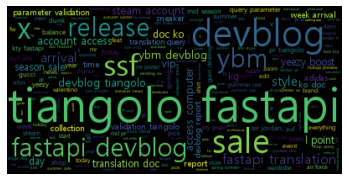

In [36]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/malgun.ttf' # For Korean characters

noun_text = ''
for word in final_NN_words:
    noun_text = noun_text +' '+word

wordcloud = WordCloud(max_font_size=60, relative_scaling=.5, font_path=FONT_PATH).generate(noun_text) # generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
subject_pos_df

,SUBJECT,wordTokens,posTag
0,do sweat it,"[do, sweat, it]","[(do, VBP), (sweat, VB), (it, PRP)]"
1,sign up travis scott x air jordan xi britis...,"[sign, up, travis, scott, x, air, jordan, xi, ...","[(sign, NN), (up, RP), (travis, NN), (scott, N..."
2,glass half full vibes,"[glass, half, full, vibes]","[(glass, NN), (half, NN), (full, JJ), (vibes, ..."
3,w,[w],"[(w, NN)]"
4,steam,[steam],"[(steam, NN)]"
...,...,...,...
3250,daily devblog,"[daily, devblog]","[(daily, JJ), (devblog, NN)]"
3251,sw sw ...,"[sw, sw]","[(sw, NN), (sw, NN)]"
3252,ybm family,"[ybm, family]","[(ybm, NNS), (family, NN)]"
3253,daily devblog,"[daily, devblog]","[(daily, JJ), (devblog, NN)]"


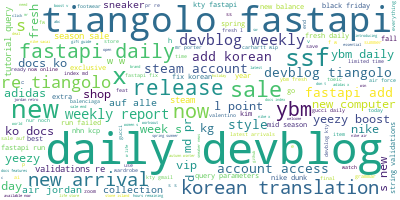

In [39]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(subject_pos_df['SUBJECT'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [40]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = subject_pos_df.SUBJECT.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['sweat']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\taeyoung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1)]


In [74]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.075*"fastapi" + 0.074*"tiangolo" + 0.024*"fresh" + 0.020*"sale" + '
  '0.015*"korean" + 0.015*"translation" + 0.013*"add" + 0.013*"tutorial" + '
  '0.012*"new" + 0.011*"summer"'),
 (1,
  '0.028*"ssf" + 0.027*"sale" + 0.025*"new" + 0.025*"docs" + 0.016*"fastapi" + '
  '0.016*"access" + 0.015*"account" + 0.015*"kty" + 0.014*"steam" + '
  '0.014*"computer"'),
 (2,
  '0.020*"new" + 0.019*"nike" + 0.015*"kim" + 0.014*"air" + 0.012*"sale" + '
  '0.011*"auf" + 0.009*"fresh" + 0.008*"go" + 0.007*"season" + '
  '0.007*"release"'),
 (3,
  '0.057*"ybm" + 0.044*"new" + 0.022*"arrivals" + 0.011*"week" + '
  '0.011*"adidas" + 0.011*"best" + 0.010*"kty" + 0.010*"yeezy" + 0.007*"vip" + '
  '0.006*"air"'),
 (4,
  '0.157*"devblog" + 0.157*"daily" + 0.012*"report" + 0.012*"weekly" + '
  '0.011*"sale" + 0.011*"new" + 0.010*"steam" + 0.009*"sw" + 0.008*"nhn" + '
  '0.008*"kcp"')]


In [76]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('C:\pythontemp\OSSTeamProject'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, 'C:\pythontemp\OSSTeamProject'+ str(num_topics) +'.html')
LDAvis_prepared

<>:6: DeprecationWarning: invalid escape sequence \p
<>:16: DeprecationWarning: invalid escape sequence \p
<>:6: DeprecationWarning: invalid escape sequence \p
<>:16: DeprecationWarning: invalid escape sequence \p
C:\Users\taeyoung\AppData\Local\Temp/ipykernel_23772/4082364127.py:6: DeprecationWarning: invalid escape sequence \p
  LDAvis_data_filepath = os.path.join('C:\pythontemp\OSSTeamProject'+str(num_topics))
C:\Users\taeyoung\AppData\Local\Temp/ipykernel_23772/4082364127.py:16: DeprecationWarning: invalid escape sequence \p
  pyLDAvis.save_html(LDAvis_prepared, 'C:\pythontemp\OSSTeamProject'+ str(num_topics) +'.html')


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.000128 -0.075351       1        1  22.520435
0     -0.017618 -0.137931       2        1  21.712494
3     -0.098460  0.089445       3        1  19.600261
2     -0.088920  0.064735       4        1  18.778578
4      0.205126  0.059102       5        1  17.388233, topic_info=          Term        Freq       Total Category  logprob  loglift
863    devblog  298.000000  298.000000  Default  30.0000  30.0000
862      daily  298.000000  298.000000  Default  29.0000  29.0000
1055  tiangolo  189.000000  189.000000  Default  28.0000  28.0000
943    fastapi  212.000000  212.000000  Default  27.0000  27.0000
631        ybm  119.000000  119.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
210       nike    6.604544   84.295932   Topic5  -5.5519  -0.7972
943    fastapi    7.835269  212.398345   Topic5  -5.3810  -1.5505
1055  tiangolo    4.760611  189.230349   Topic5  -5.8793  -1.9332
246       time    4.097019   26.706045   Topic5  -6.0294  -0.1253
1169      docs    4.226260   71.262414   Topic5  -5.9983  -1.0757

[345 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
613       2  0.193250     abc
613       3  0.096625     abc
613       4  0.676377     abc
23        1  0.896056  access
23        2  0.051203  access
...     ...       ...     ...
289       1  0.732022    zero
846       2  0.712727    zoom
846       4  0.178182    zoom
846       5  0.089091    zoom
1028      2  0.639939      zu

[628 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3, 5])

In [77]:
topic_list = list(lda_model.print_topics())

In [96]:
topic_list[0][1]

'0.075*"fastapi" + 0.074*"tiangolo" + 0.024*"fresh" + 0.020*"sale" + 0.015*"korean" + 0.015*"translation" + 0.013*"add" + 0.013*"tutorial" + 0.012*"new" + 0.011*"summer"'

In [101]:
import re
word_list=[]
for i in range(5):
    a = topic_list[i][1]
    word = " ".join(re.findall("[a-zA-Z]+",a))
    word_list.append(word)
    print(word_list[i].split(' ')[0])

fastapi
ssf
new
ybm
devblog
